In [8]:
import pandas as pd
import numpy as np
from lifetimes import BetaGeoFitter
from matplotlib import pylab as plt

%matplotlib inline

In [33]:
# from lifetimes.datasets import load_cdnow_summary
# data = load_cdnow_summary(index_col=[0])

data = pd.read_csv('~/Downloads/customer_frequency_recency.csv')

In [34]:
data.head()

,user_id,frequency,recency,t
0,6366,0,0,203
1,8487,0,0,202
2,8533,0,0,202
3,9087,0,0,202
4,8735,0,0,201


In [35]:
# similar API to scikit-learn and lifelines.
bgf = BetaGeoFitter(penalizer_coef=0.001)
bgf.fit(data['frequency'], data['recency'], data['t'])
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 307614 subjects, a: 0.02, alpha: 214.93, b: 0.12, r: 0.37>


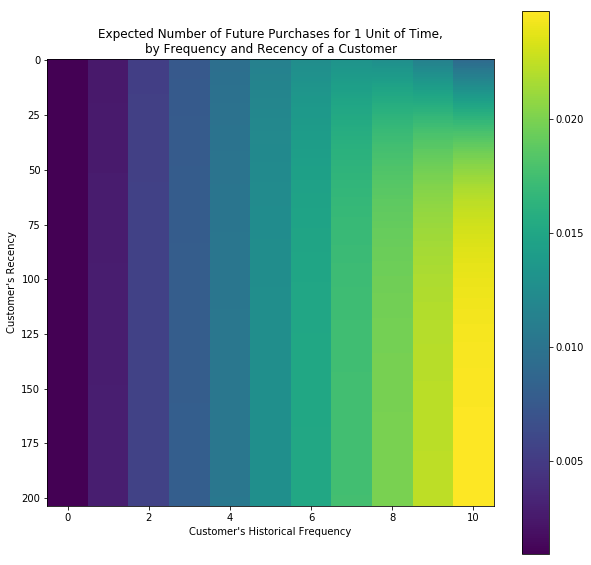

In [36]:
from lifetimes.plotting import plot_frequency_recency_matrix

plt.figure(figsize = (10,10))
plot_frequency_recency_matrix(bgf)
plt.show();

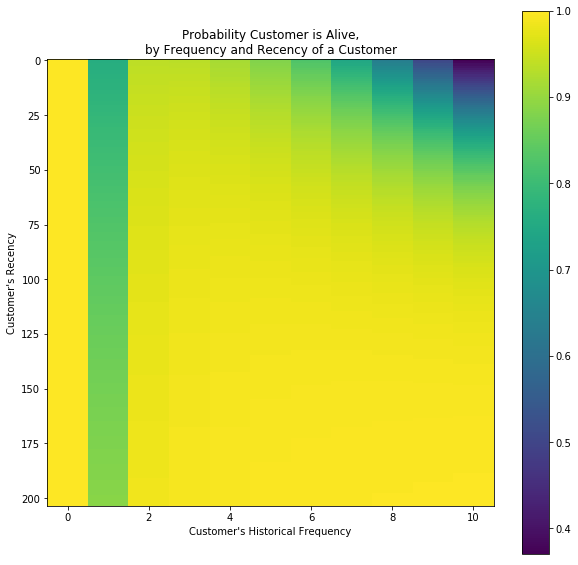

In [37]:
from lifetimes.plotting import plot_probability_alive_matrix

plt.figure(figsize = (10,10))
plot_probability_alive_matrix(bgf)
plt.show();

In [41]:
t = 26
data['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, 
                                                                                      data['frequency'], 
                                                                                      data['recency'], 
                                                                                      data['t'])
data.sort_values(by='predicted_purchases').tail(5)

,user_id,frequency,recency,t,predicted_purchases
49874,210071,7,73,74,0.660903
46518,42876,10,128,164,0.707654
152723,143349,8,88,91,0.709081
27123,201355,8,62,83,0.726894
102608,275271,8,66,67,0.769490


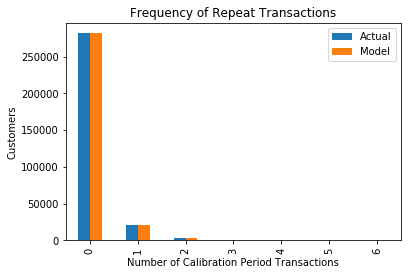

In [42]:
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)